In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # Petal Length, Petal Width
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge")),
))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_clf.fit(X_scaled, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
))

polynomial_svm_clf.fit(X, y)

# We can use polynomial features to classify complex structure by linear SVC
# But High polynomial slow the model

C:\Users\LENOVA\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

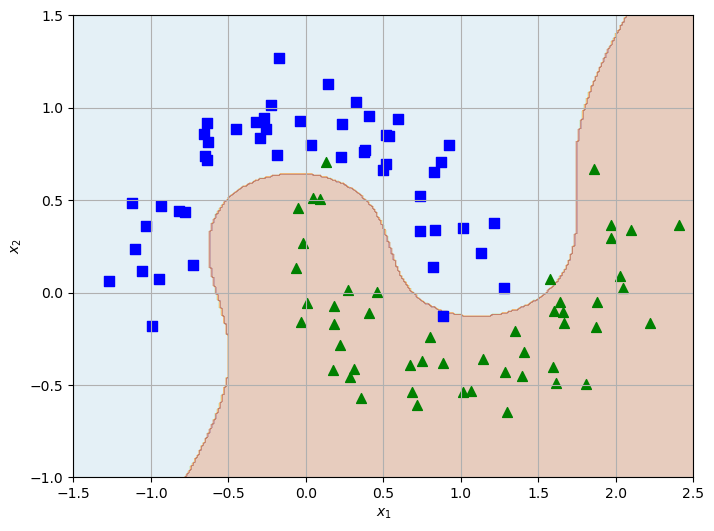

In [4]:
import matplotlib.pyplot as plt

x0s = np.linspace(-1.5, 2.5, 300)
x1s = np.linspace(-1, 1.5, 300)
xx, yy = np.meshgrid(x0s, x1s)
X_grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = polynomial_svm_clf.predict(X_grid)
zz = y_pred.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)

#Plot data points with custom shapes
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='s', s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], c='green', marker='^', s=50)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

In [5]:
from sklearn.svm import SVC

poly_kernal_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 25)),
))

poly_kernal_svm_clf.fit(X, y)

# We can adjust Coefficient and C value to increase or decrease the street border


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=25, coef0=1, kernel='poly'))])

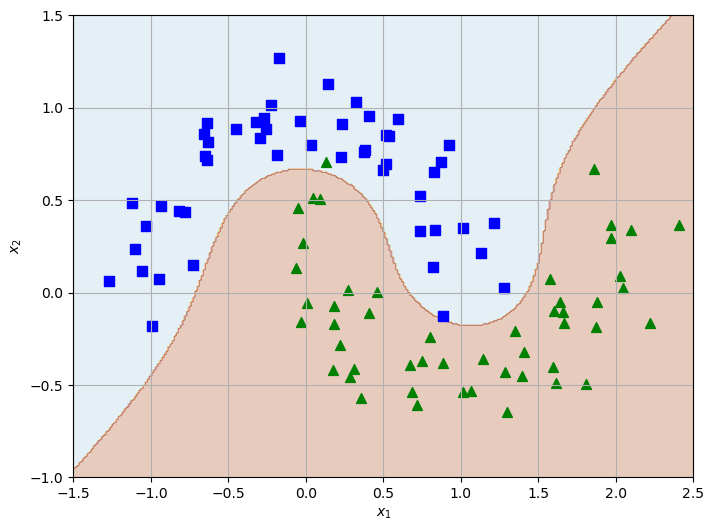

In [6]:
x0s = np.linspace(-1.5, 2.5, 300)
x1s = np.linspace(-1, 1.5, 300)
xx, yy = np.meshgrid(x0s, x1s)
X_grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = poly_kernal_svm_clf.predict(X_grid)
zz = y_pred.reshape(xx.shape)

# 4. Plot decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)

# 5. Plot data points with custom shapes
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='s', s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], c='green', marker='^', s=50)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly"))
])


param_grid = {
    "svm_clf__degree": [3,4,5,7,10,15],
    "svm_clf__coef0": [0,1,3,5,10],
    "svm_clf__C": [0.1,1,5,10,15,25,50,100]
}

grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X,y)

print("Best Parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


# we can use Grid search to find the best optimum parameters to get maximum accuracy by comparing combination of different parameters


Best Parameters: {'svm_clf__C': 25, 'svm_clf__coef0': 1, 'svm_clf__degree': 3}
Best accuracy: 0.9800000000000001


In [8]:
rbf_kernal_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 6, C = 0.001))
))
rbf_kernal_svm_clf.fit(X, y)

# We can use kernal function to calaculate higher dimensional points faster using gamma value and C value
# Changing the gamma value influemce the classification boundary significantly like increse in gamme lead to ovrefit and decrease in gamma lead to underfitting
# Use gamma value like regularization to get optimum results

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=6))])

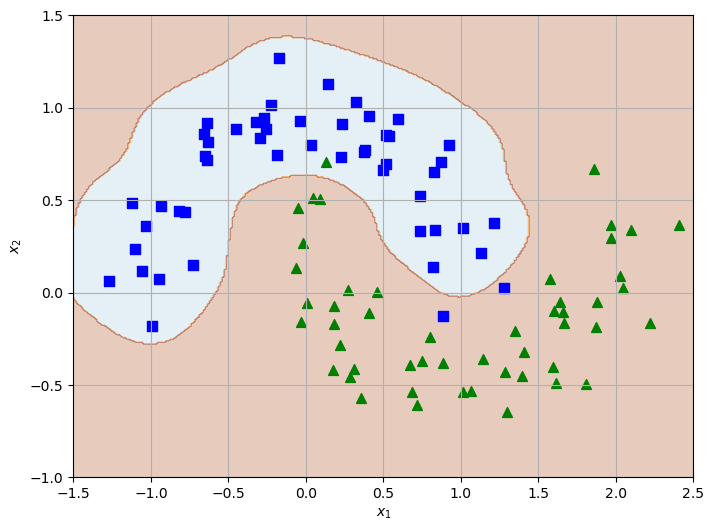

In [9]:
x0s = np.linspace(-1.5, 2.5, 300)
x1s = np.linspace(-1, 1.5, 300)
xx, yy = np.meshgrid(x0s, x1s)
X_grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = rbf_kernal_svm_clf.predict(X_grid)
zz = y_pred.reshape(xx.shape)

# 4. Plot decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)

# 5. Plot data points with custom shapes
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='s', s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], c='green', marker='^', s=50)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

In [10]:
# SVM Regression

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

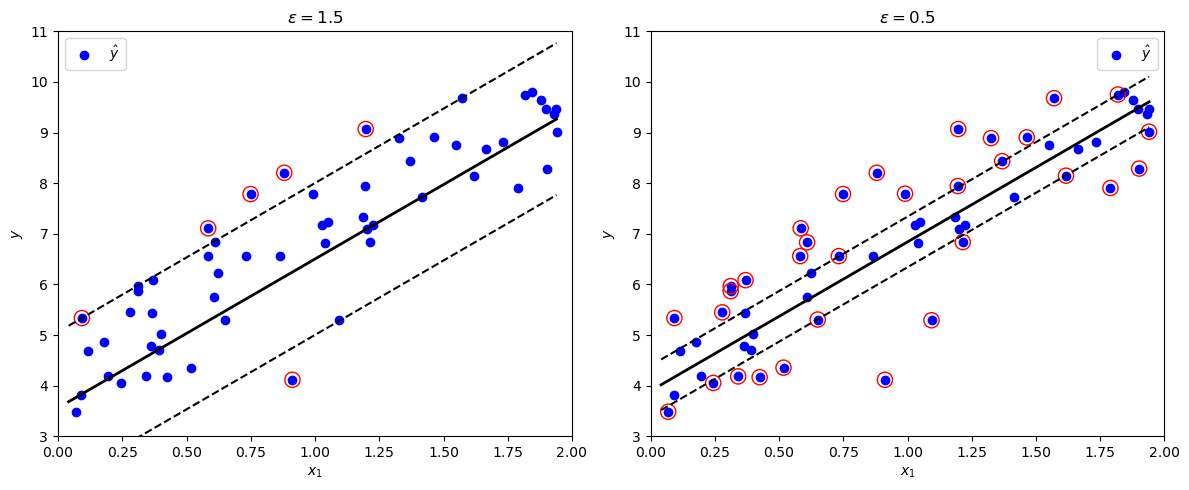

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

np.random.seed(42)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, epsilon in zip(axes, [1.5, 0.5]):
    svm_reg = LinearSVR(epsilon=epsilon, random_state=42)
    svm_reg.fit(X, y)
    y_pred = svm_reg.predict(X)
    
    # Plot data points
    ax.scatter(X, y, color='blue')
    ax.plot(X, y_pred, color='black', linewidth=2, label='$\\hat{y}$')
    
    # Support vectors: points outside the epsilon tube
    residuals = np.abs(y - y_pred)
    support_mask = residuals > epsilon
    ax.scatter(X[support_mask], y[support_mask], edgecolor='red', facecolor='none', s=120)
    
    # Epsilon tube
    ax.plot(X, y_pred + epsilon, 'k--')
    ax.plot(X, y_pred - epsilon, 'k--')
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$y$')
    ax.set_xlim(0, 2)
    ax.set_ylim(3, 11)
    ax.set_title(f'$\\epsilon={epsilon}$')
    ax.legend(['$\\hat{y}$'])

plt.tight_layout()
plt.show()


In [33]:
# Nonlinear Regression can solved by the same kernel SVR

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.5)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, epsilon=0.5, kernel='poly')

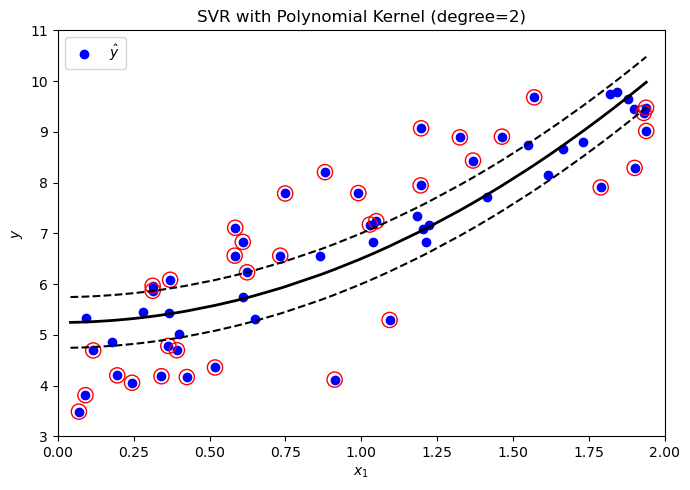

In [34]:
y_pred = svm_poly_reg.predict(X)

plt.figure(figsize=(7, 5))

# Blue dots for original data points
plt.scatter(X, y, color='blue')

# Black line for SVR regression predictions
plt.plot(X, y_pred, color='black', linewidth=2, label='$\\hat{y}$')

# Identify and highlight support vectors
support_indices = svm_poly_reg.support_
plt.scatter(X[support_indices], y[support_indices], edgecolor='red', facecolor='none', s=120)

# Draw epsilon-tube boundaries around the prediction curve
plt.plot(X, y_pred + svm_poly_reg.epsilon, 'k--')
plt.plot(X, y_pred - svm_poly_reg.epsilon, 'k--')

plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.xlim(0, 2)
plt.ylim(3, 11)
plt.title('SVR with Polynomial Kernel (degree=2)')
plt.legend(['$\\hat{y}$'])

plt.tight_layout()
plt.show()